In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts


In [8]:
T = 1
n = 1000
N = 1000
S0 = 100
sigma = 0.3
r = 0.05


In [9]:
def generate_W(T,N,n):
    del_t = T/n
    Z = np.random.randn(N, n)
    W = np.cumsum(np.sqrt(del_t)*Z,axis=1)
    W = np.concatenate((np.zeros((N,1)),W), axis = 1)
    return W

def generate_S(W, S0, mu, sigma, T, n):
    del_t = T/n
    tt = np.arange(n+1)*T/n
    return S0*np.exp((mu-sigma*sigma/2)*tt + sigma*W)

In [11]:
# Q1
mu = [0.05, 0.02, 0.45]
W = generate_W(T,N,n)
for i in mu:
    S = generate_S(W,S0,i,sigma,T,n)
    sample_mean = np.mean(S[:,-1])
    sample_var = np.var(S[:,-1])
    theoretical_mean = S0*np.exp(i*T)
    print("*"*50)
    print("mu = "+str(i))
    print("The sample mean of S_T: "+str(sample_mean))
    print("The therotical mean of S_T: "+str(theoretical_mean))
    print("The sample variance of S_T: "+str(sample_var))
    print("The confidence interval of S_T at level 95%: ["+str(sample_mean- np.sqrt(sample_var/N)*1.96)+
          ", "+str(sample_mean+ np.sqrt(sample_var/N)*1.96)+"]")
    

**************************************************
mu = 0.05
The sample mean of S_T: 105.81469187418381
The therotical mean of S_T: 105.12710963760242
The sample variance of S_T: 1043.2616634904932
The confidence interval of S_T at level 95%: [103.81274432080858, 107.81663942755904]
**************************************************
mu = 0.02
The sample mean of S_T: 102.68739511311328
The therotical mean of S_T: 102.02013400267558
The sample variance of S_T: 982.5068339234518
The confidence interval of S_T at level 95%: [100.74461405154193, 104.63017617468464]
**************************************************
mu = 0.45
The sample mean of S_T: 157.85697071120845
The therotical mean of S_T: 156.83121854901688
The sample variance of S_T: 2321.8215312252287
The confidence interval of S_T at level 95%: [154.87041590770076, 160.84352551471613]


# Conclusion
As we know, the theoretical mean of S_T is $$S_0 e^{\mu*t},$$ 
so we compare the sample means with the theoretical means. The theoretical means are within the confidence interval of sample mean of S_T

In [14]:
def d_plus(sigma,T,t,S,K,r):
    return 1./(sigma*np.sqrt(T-t))*(np.log(S/K)+(r+sigma*sigma/2.)*(T-t))
    
def d_minus(sigma,T,t,S,K,r):
    return d_plus(sigma,T,t,S,K,r) - sigma*np.sqrt(T-t)

def Delta_BS(S, T,n,r,sigma,K):
    tt = np.arange(n+1)*T/n
    d1 = d_plus(sigma,T,tt,S,K,r)
    return sts.norm.cdf(d1)

def Call(T,r,sigma,K,S0):
    d1 = d_plus(sigma,T,0,S0,K,r)
    d2 = d_minus(sigma,T,0,S0,K,r)
    return S0*sts.norm.cdf(d1) - K*np.exp(-r*T)*sts.norm.cdf(d2)

mu = 0.05, calculating...


/Users/FanJiang/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


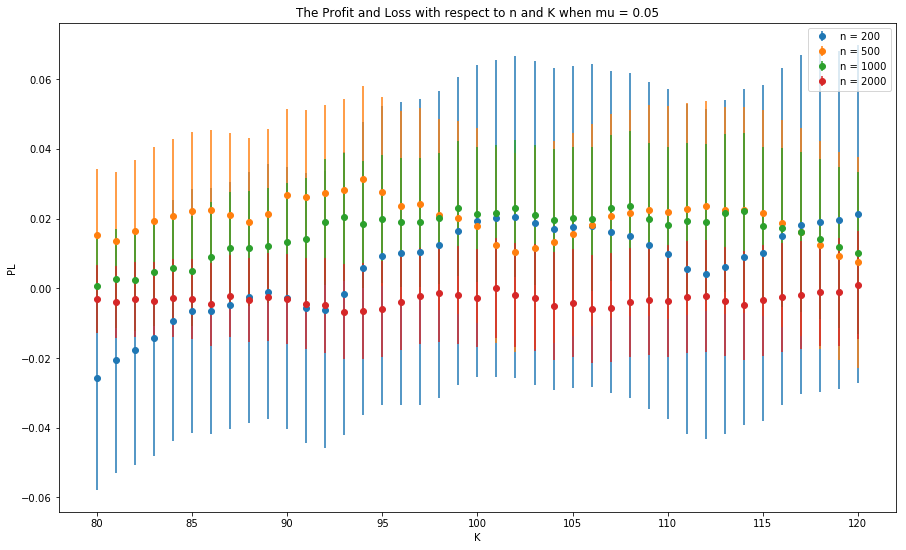

mu = 0.02, calculating...


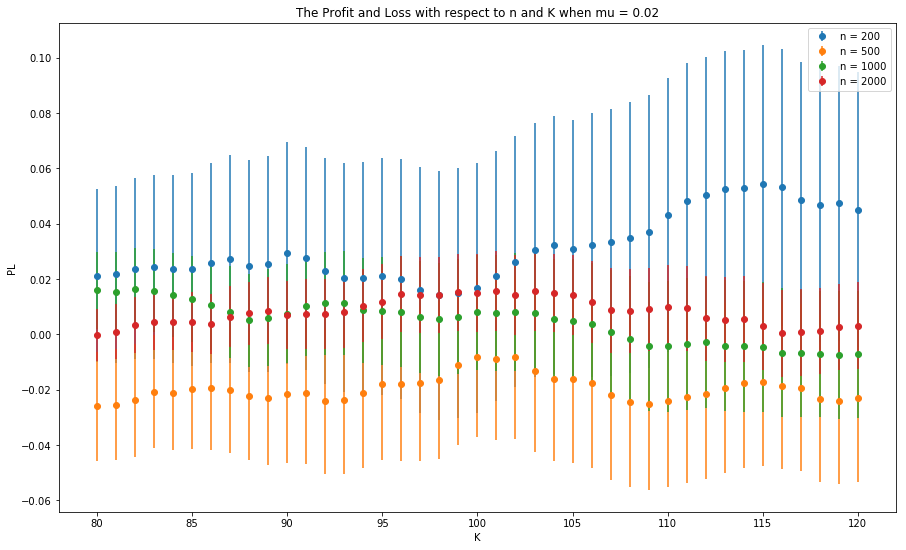

mu = 0.45, calculating...


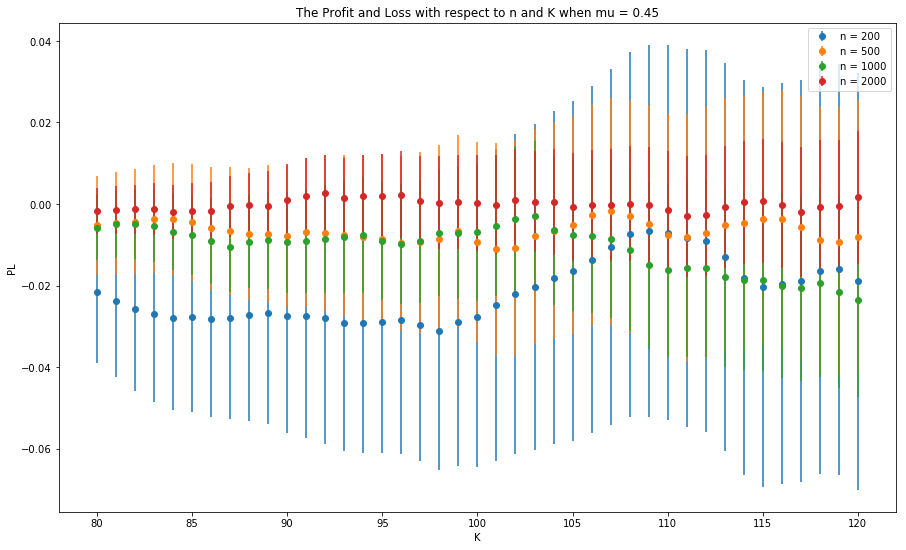

In [20]:
#Q2
nn = [200, 500, 1000, 2000]
K = np.arange(80, 121)
for mu_i in mu:
    PL_nK_mean = []
    PL_nK_std = []
    print("mu = {}, calculating...".format(mu_i))
    for n in nn:
        W = generate_W(T,N,n)
        S = generate_S(W,S0,mu_i,sigma,T,n)
        tt = np.arange(n+1)*T/n
        PL_nK_mean.append([])
        PL_nK_std.append([])
        for k in K:
            delta_trajec = Delta_BS(S,T,n,r,sigma,k)
            call_price = Call(T,r,sigma,k,S0)
            X_T = np.exp(r*T)* (call_price + 
                    np.sum(delta_trajec[:,0:-1]*(np.exp(-r*tt[1:])*S[:,1:]-np.exp(-r*tt[0:-1])*S[:,0:-1]),axis = 1))
            PL = X_T - ((S[:,-1]-k)>0)*(S[:,-1]-k)
            PL_nK_mean[-1].append(np.mean(PL))
            PL_nK_std[-1].append(np.std(PL))
    
    plt.figure(figsize=(15,9))
    for i in range(len(nn)):
        plt.errorbar(x=K, y=PL_nK_mean[i],yerr=[j/np.sqrt(N)*1.96 for j in PL_nK_std[i]], fmt = 'o', 
                     label = "n = "+str(nn[i]) )
    plt.title("The Profit and Loss with respect to n and K when mu = "+str(mu_i))
    plt.xlabel("K")
    plt.ylabel("PL")
    plt.legend(loc = "best")
    plt.show()

# Conclusion
For different mu, we have plots of the Profit and Loss with respect to differnent n and K. As n increase, the time step decrease, so the errors of final results decrease. As we can see from the result, regardless of n and K, the final PLs are near 0 if we use delta hedging.
